In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
sns.set()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zaral\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
imdb = pd.read_csv('IMDB Dataset.csv')
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
imdb.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [4]:
corpus = []
for text in imdb['review']:
    words = [ word for word in word_tokenize(text)]
    corpus.append(words)

In [5]:
corpus[0]

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'They',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 '.',
 'Trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'Its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'It',
 'is',
 'called',
 'OZ',
 'as',


In [6]:
num_words = len(corpus)
print(num_words)

50000


In [7]:
train_size = int(imdb.shape[0] * 0.8)
X_train = imdb.review[:train_size]
y_train = imdb.sentiment[:train_size]

X_test = imdb.review[train_size:]
y_test = imdb.sentiment[train_size:]

In [8]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = 128, truncating = 'post', padding = 'post')

In [10]:
X_train[0], len(X_train[0])

(array([   27,     4,     1,    80,  2102,    45,  1073,    12,   100,
          147,    39,   316,  2968,   409,   459,    26,  3173,    33,
           23,   200,    14,    11,     6,   614,    48,   606,    16,
           68,     7,     7,     1,    87,   148,    12,  3256,    68,
           41,  2968,    13,    92,  5626,     2, 16202,   134,     4,
          569,    60,   271,     8,   200,    36,     1,   673,   139,
         1712,    68,    11,     6,    21,     3,   118,    15,     1,
         7870,  2257,    38, 11540,    11,   118,  2495,    54,  5662,
           16,  5182,     5,  1438,   377,    38,   569,    92,     6,
         3730,     8,     1,   360,   353,     4,     1,   673,     7,
            7,     9,     6,   431,  2968,    14,    12,     6,     1,
        11736,   356,     5,     1, 14689,  6526,  2594,  1087,     9,
         2661,  1432,    20, 22583,   534,    32,  4795,  2451,     4,
            1,  1193,   117,    29,     1,  6893,    25,  2874, 12191,
      

In [11]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen= 128, truncating = 'post', padding = 'post')

In [12]:
X_test[0], len(X_test[0])

(array([   87,   122,    10,   180,     5,   132,    12,    10,  7131,
         3717,    20,     1,  1001,  2285,     2,    10,   255,     1,
           17,  2431,    10,  1311,     5,   103,     1,   222,  6349,
            4,     3,    19,    11,    17,   974,     3,   351,     5,
          215,  1011,   415,     9,    13,   215,  1380,    56,   235,
          402,   300,     4,   316,    23,   257,    19,   961,    12,
        22250,    12,    33,    66,    61,   212,    53,    16,    11,
          113,    13,   497,     2,     1,   102,    70,  5358,    15,
            1,    88,   172,     1,   473,   824,     8,     1,    64,
           67,    54,    49,  2406,    30,    29,    33,    90,    40,
        35787,    83,    46,   438,     4,     3,    74,   220,     2,
           10,   115,    21,    63,    12,    30,    29,   268,    10,
         1059,   137,    10,    78,    21,   119,    28,    13,     1,
           88,   175,     5,   728,  3423,   108,     8,     1,    17,
      

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 128) (40000,)
(10000, 128) (10000,)


In [14]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [15]:
model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 100, input_length = 128, trainable = True))
model.add(LSTM(100, dropout= 0.1, return_sequences = True))
model.add(LSTM(100, dropout = 0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 128, 100)          5000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128, 100)          80400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 5,160,901
Trainable params: 5,160,901
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/5
313/313 [==============================] - 125s 398ms/step - loss: 0.0179 - accuracy: 0.9955 - val_loss: 0.7719 - val_accuracy: 0.8476
Epoch 2/5
313/313 [==============================] - 123s 394ms/step - loss: 0.0804 - accuracy: 0.9761 - val_loss: 0.5677 - val_accuracy: 0.8318
Epoch 3/5
313/313 [==============================] - 122s 390ms/step - loss: 0.0739 - accuracy: 0.9739 - val_loss: 0.6449 - val_accuracy: 0.8423
Epoch 4/5
313/313 [==============================] - 123s 393ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.7807 - val_accuracy: 0.8425
Epoch 5/5
313/313 [==============================] - 123s 394ms/step - loss: 0.0257 - accuracy: 0.9925 - val_loss: 0.6734 - val_accuracy: 0.8365


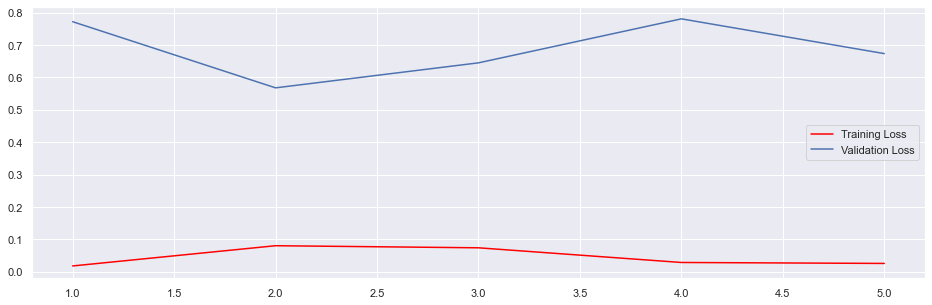

In [26]:
plt.figure(figsize = (16, 5))
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'], 'b', label = 'Training Loss', color = 'red')
plt.plot(epochs, history.history['val_loss'], 'b', label = 'Validation Loss')
plt.legend()
plt.show()

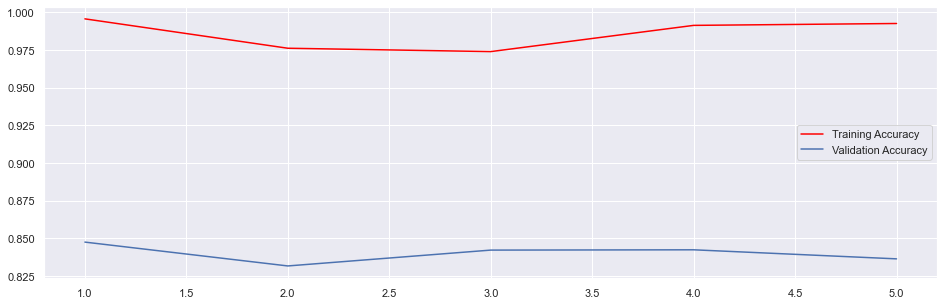

In [27]:
plt.figure(figsize = (16, 5))
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'b', label = 'Training Accuracy', color = 'red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label = 'Validation Accuracy')
plt.legend()
plt.show()

In [28]:
validation_sentence = ['This movie was not good at all. It had some good parts like the acting was pretty good but the story was not impressing at all.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen = 128, truncating= 'post', padding = 'post')

print(validation_sentence[0])
print('Probability of Positive: {}'.format(model.predict(validation_sentence_padded)[0]))

This movie was not good at all. It had some good parts like the acting was pretty good but the story was not impressing at all.
Probability of Positive: [0.5359301]


In [29]:
validation_sentence = ['I can watch this movie forever just because of the beauty in its cinematography']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen = 128, truncating= 'post', padding = 'post')

print(validation_sentence[0])
print('Probability of Positive: {}'.format(model.predict(validation_sentence_padded)[0]))

I can watch this movie forever just because of the beauty in its cinematography
Probability of Positive: [0.92042655]


In [30]:
validation_sentence = ['This is the best movie I have ever watched before']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen = 128, truncating= 'post', padding = 'post')

print(validation_sentence[0])
print('Probability of Positive: {}'.format(model.predict(validation_sentence_padded)[0]))

This is the best movie I have ever watched before
Probability of Positive: [0.9342745]


In [33]:
validation_sentence = ['Honestly, I do not like this moive that much.']
validation_sentence_tokened = tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded = pad_sequences(validation_sentence_tokened, maxlen = 128, truncating= 'post', padding = 'post')

print(validation_sentence[0])
print('Probability of Positive: {}'.format(model.predict(validation_sentence_padded)[0]))

Honestly, I do not like this moive that much.
Probability of Positive: [0.36767805]
